In [1]:
######Multiclass_defect_detection

import cv2
import glob
import numpy as np
import os.path as path
from scipy import misc
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Activation, Dropout,Dense, Conv2D, MaxPooling2D,Input, Convolution2D, Flatten
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from datetime import datetime
from keras.models import Model 
import matplotlib.pyplot as plt

IMAGE_PATH = 'C:\\Users\\thaqu\\Desktop\\Metal-Surface-Defect-Inspection-master\\NEUDATA\\NEU-DET\\IMAGES\\'
file_paths = glob.glob(path.join(IMAGE_PATH, '*.jpg'))

Using TensorFlow backend.


In [2]:
# Loading the images....
images = [cv2.imread(path) for path in file_paths]
images=[cv2.resize(image,(50,50)) for image in images ]
images = np.asarray(images)

images[0]

array([[[197, 197, 197],
        [210, 210, 210],
        [158, 158, 158],
        ...,
        [138, 138, 138],
        [134, 134, 134],
        [ 97,  97,  97]],

       [[200, 200, 200],
        [232, 232, 232],
        [190, 190, 190],
        ...,
        [129, 129, 129],
        [153, 153, 153],
        [126, 126, 126]],

       [[224, 224, 224],
        [197, 197, 197],
        [183, 183, 183],
        ...,
        [137, 137, 137],
        [121, 121, 121],
        [116, 116, 116]],

       ...,

       [[214, 214, 214],
        [211, 211, 211],
        [213, 213, 213],
        ...,
        [134, 134, 134],
        [ 87,  87,  87],
        [ 97,  97,  97]],

       [[229, 229, 229],
        [249, 249, 249],
        [195, 195, 195],
        ...,
        [103, 103, 103],
        [135, 135, 135],
        [ 96,  96,  96]],

       [[218, 218, 218],
        [221, 221, 221],
        [210, 210, 210],
        ...,
        [195, 195, 195],
        [140, 140, 140],
        [149, 149, 149]]

In [3]:
# Get image size
image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)

[50 50  3]


In [4]:
print(images.shape)

(1800, 50, 50, 3)


In [5]:
# Scale
X_train = images / 255
# Read the labels from the filenames
n_images = images.shape[0]

In [6]:
y_train =[]
for i in range(n_images):
    y_train.append(int(i/300))

In [7]:
y_train[1756]

5

In [8]:
batch_size = 90
num_epochs = 30
kernel_size = 3
pool_size = 2 
conv_depth_1 = 32
conv_depth_2 = 64
drop_prob_1 = 0.5
drop_prob_2 = 0.75
hidden_size = 256

In [9]:
num_train, height, width, depth = X_train.shape # there are 1800 training examples
#num_test = X_test.shape[0] 
num_classes = np.unique(y_train).shape[0] # there are 6 image classes

In [10]:
num_train

1800

In [11]:
height

50

In [12]:
width

50

In [13]:
depth

3

In [14]:
num_classes

6

In [15]:
X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
#X_test /= np.max(X_test) # Normalise data to [0, 1] range

In [16]:
Y_train = np_utils.to_categorical(y_train, num_classes)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_train , Y_train, test_size = 0.01, random_state = 0)

In [18]:
X_train.shape

(1782, 50, 50, 3)

In [19]:
X_test.shape

(18, 50, 50, 3)

In [20]:
y_train.shape

(1782, 6)

In [21]:
y_test.shape

(18, 6)

In [22]:
inp = Input(shape=(height, width, depth))

conv_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)

conv_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)
# Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)


In [23]:
model = Model(inputs=inp, outputs=out) 

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) 

model.fit(X_train, y_train,                
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1)

Train on 1603 samples, validate on 179 samples
Epoch 1/30
1603/1603 [==============================] - 10s 6ms/step - loss: 1.8046 - accuracy: 0.1822 - val_loss: 1.7701 - val_accuracy: 0.1564
Epoch 2/30
1603/1603 [==============================] - 9s 6ms/step - loss: 1.7247 - accuracy: 0.2240 - val_loss: 1.7164 - val_accuracy: 0.2849
Epoch 3/30
1603/1603 [==============================] - 10s 6ms/step - loss: 1.6833 - accuracy: 0.2801 - val_loss: 1.6336 - val_accuracy: 0.2961
Epoch 4/30
1603/1603 [==============================] - 9s 6ms/step - loss: 1.6565 - accuracy: 0.2863 - val_loss: 1.6974 - val_accuracy: 0.3128
Epoch 5/30
1603/1603 [==============================] - 10s 6ms/step - loss: 1.6140 - accuracy: 0.3331 - val_loss: 1.5973 - val_accuracy: 0.3855
Epoch 6/30
1603/1603 [==============================] - 10s 6ms/step - loss: 1.5218 - accuracy: 0.3481 - val_loss: 1.4912 - val_accuracy: 0.4078
Epoch 7/30
1603/1603 [==============================] - 9s 6ms/step - loss: 1.4160 - 

In [24]:
from keras.models import model_from_json

In [25]:
scores = model.evaluate(X_train, y_train, verbose=0)

In [26]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 95.06%


In [27]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [28]:
n_classes=6

IMAGE_PATH = 'C:\\Users\\thaqu\\Desktop\\Metal-Surface-Defect-Inspection-master\\TestImages'
file_paths = glob.glob(path.join(IMAGE_PATH, '*.jpg'))
# Load the images
images = [cv2.imread(path) for path in file_paths]
act_image=[cv2.resize(image,(200,200)) for image in images ]
images=[cv2.resize(image,(50,50)) for image in images ]
images= np.asarray(images)
# Get image size
image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(image_size)
# Scale
images = images / 255
X_test=images
X_test = X_test.astype('float32')
X_test /= np.max(X_test)


[50 50  3]


In [29]:
test_predictions = model.predict(X_test)
a=len(X_test)
proba = model.predict(X_test[0:a])
test_predictions = np.round(test_predictions)
y_pred=test_predictions


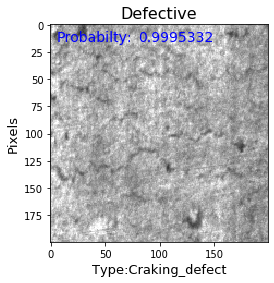

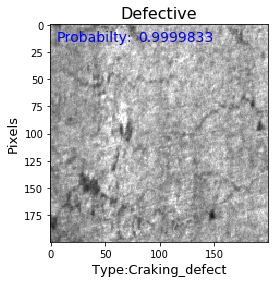

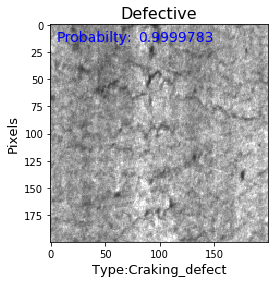

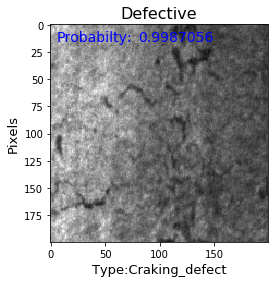

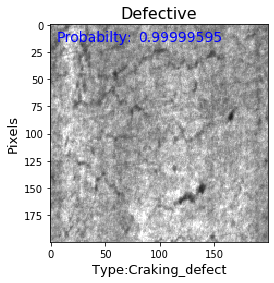

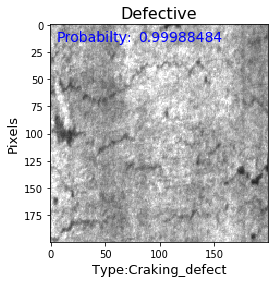

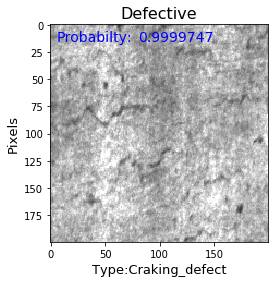

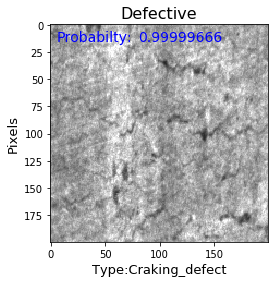

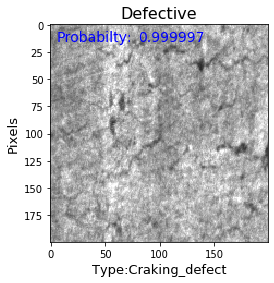

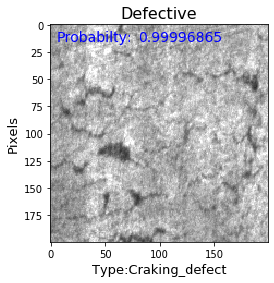

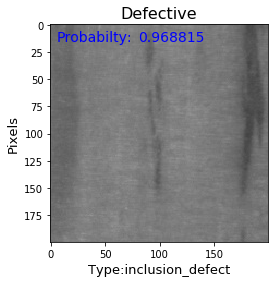

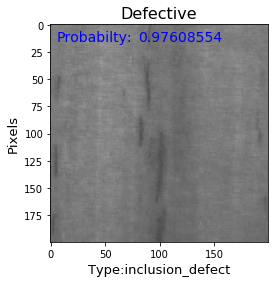

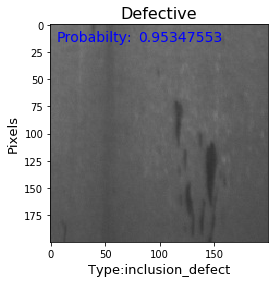

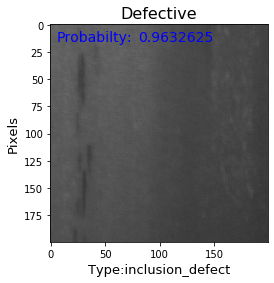

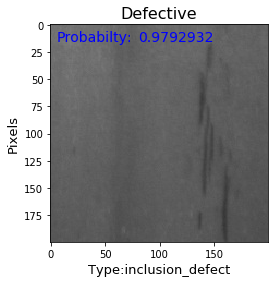

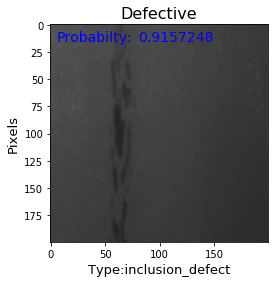

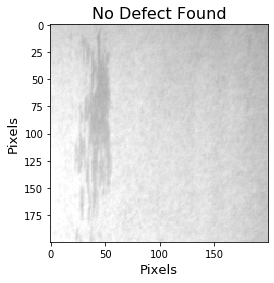

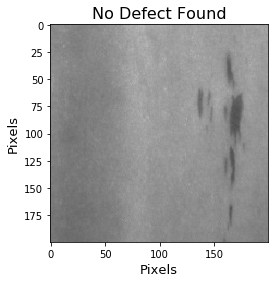

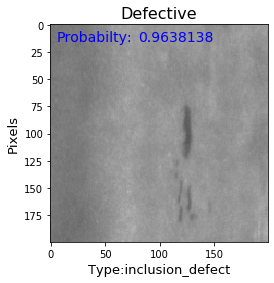

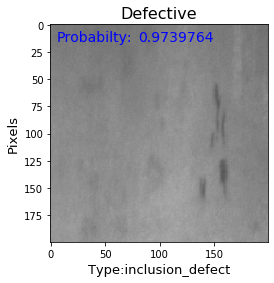

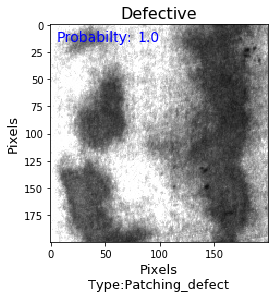

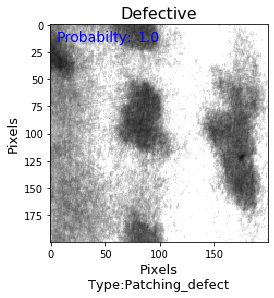

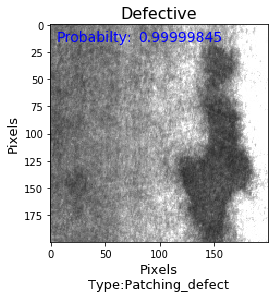

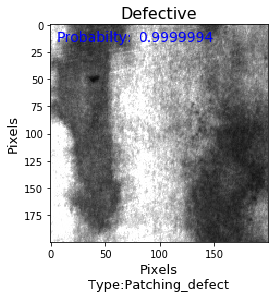

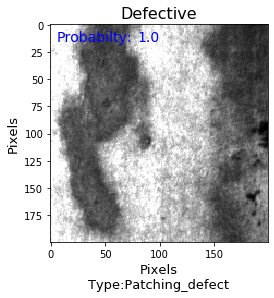

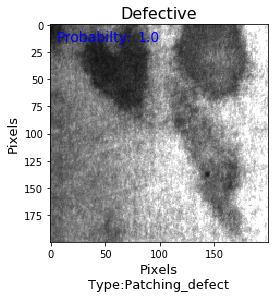

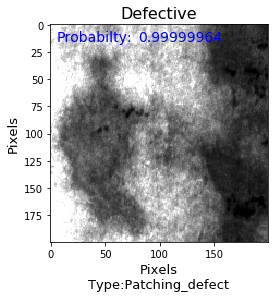

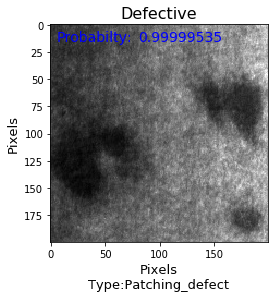

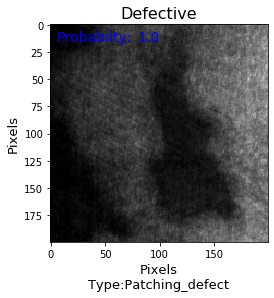

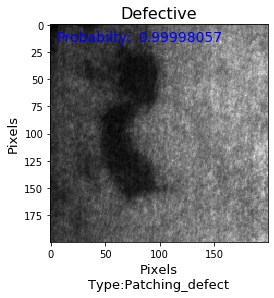

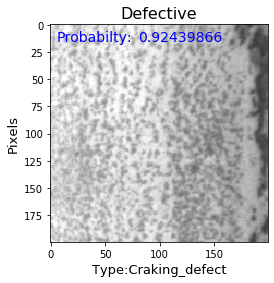

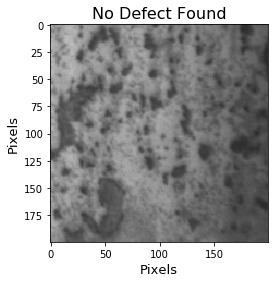

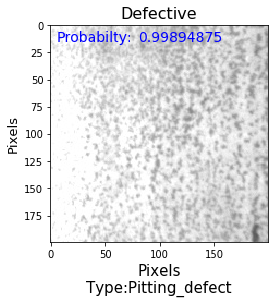

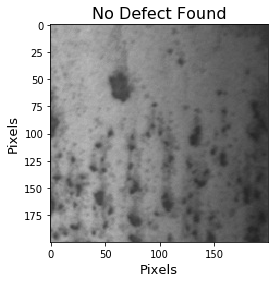

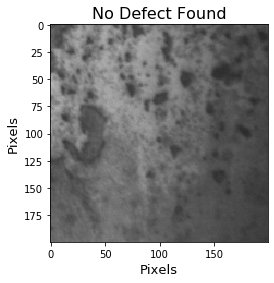

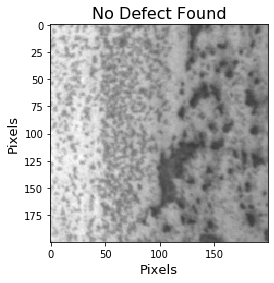

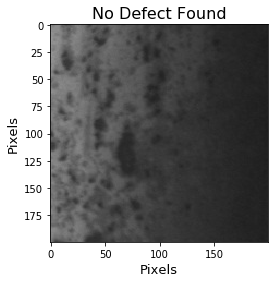

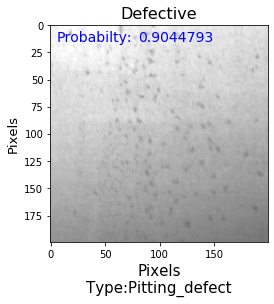

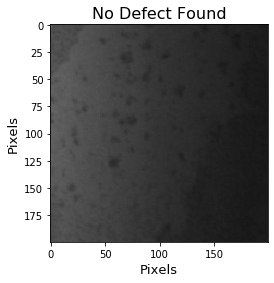

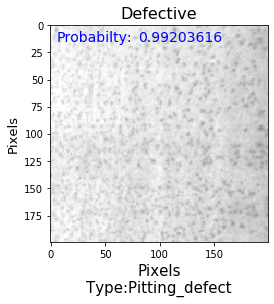

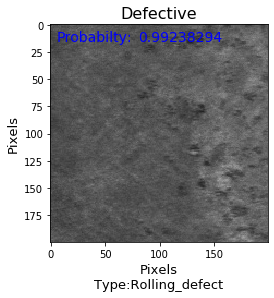

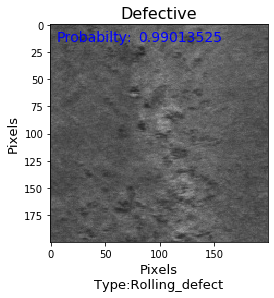

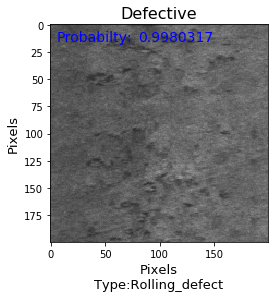

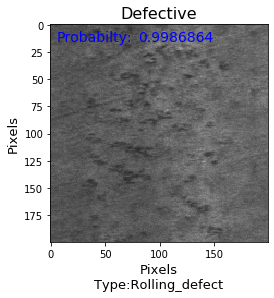

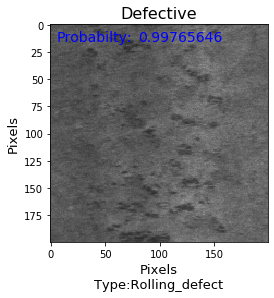

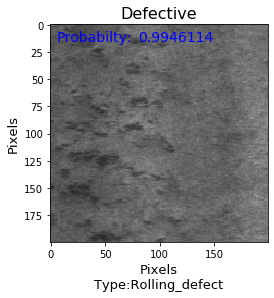

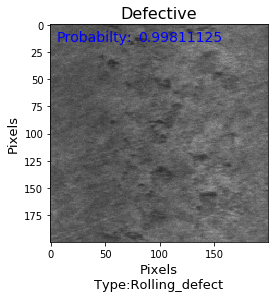

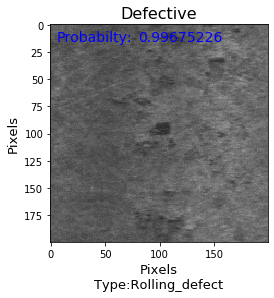

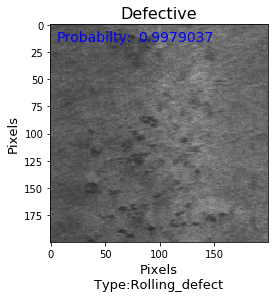

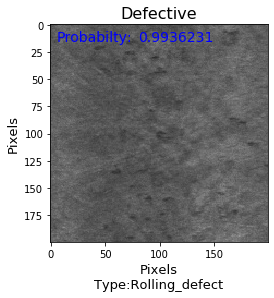

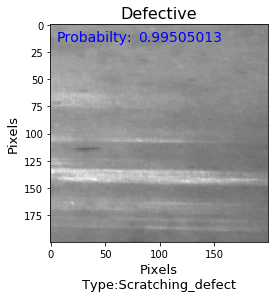

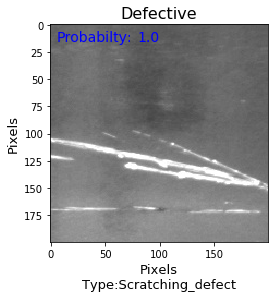

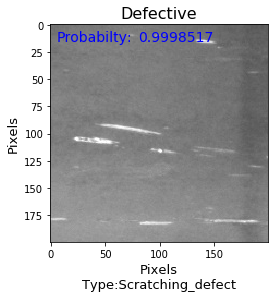

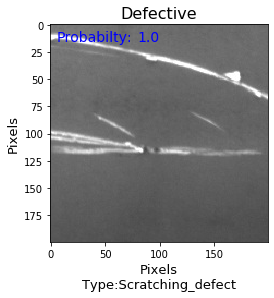

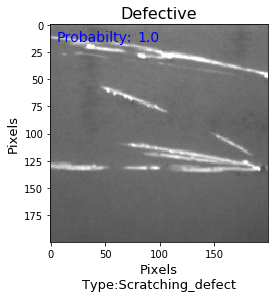

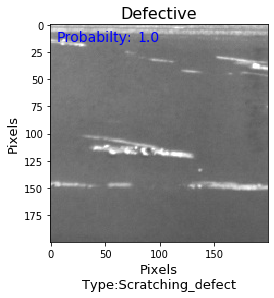

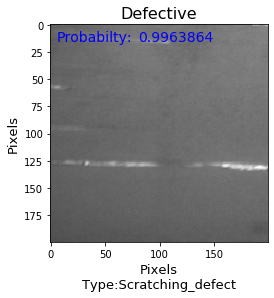

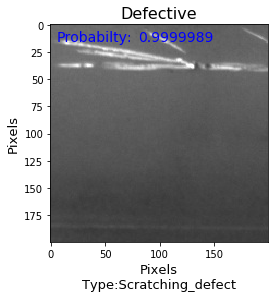

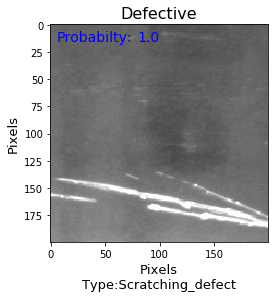

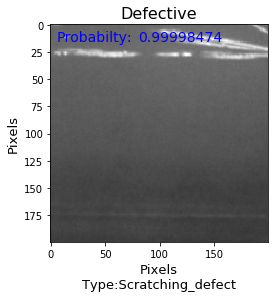

In [30]:
for i in range(a):
    flag=0
    for j in range(n_classes):
        if proba[i][j]>0.9:
            flag=1
            if j==0:
                plt.imshow(act_image[i])
                plt.title("Defective", fontsize=16)
                plt.text(5,15,r'Probabilty:', fontsize=14,color='blue')
                plt.text(80,15,proba[i][j], fontsize=14,color='blue')
                plt.ylabel("Pixels", fontsize=13,color='black')
                plt.xlabel("Pixels", fontsize=13,color='black')
                plt.xlabel("Type:Craking_defect", fontsize=13)
                plt.show()
                
            elif j==1:
                plt.imshow(act_image[i])
                plt.title("Defective", fontsize=16)
                plt.text(5,15,r'Probabilty:', fontsize=14,color='blue')
                plt.text(80,15,proba[i][j], fontsize=14,color='blue')
                plt.ylabel("Pixels", fontsize=13,color='black')
                plt.xlabel("Pixels", fontsize=13,color='black')
                plt.xlabel("Type:inclusion_defect", fontsize=13)
                plt.show()
            elif j==2:
                plt.imshow(act_image[i])
                plt.title("Defective", fontsize=16)
                plt.ylabel("Pixels", fontsize=13,color='black')
                plt.xlabel("Pixels", fontsize=13,color='black')
                plt.xlabel("Pixels\nType:Patching_defect", fontsize=13)
                plt.text(5,15,r'Probabilty:', fontsize=14,color='blue')
                plt.text(80,15,proba[i][j], fontsize=14,color='blue')
                plt.show()
            elif j==3:
                plt.imshow(act_image[i])
                plt.title("Defective", fontsize=16)
                plt.ylabel("Pixels", fontsize=13,color='black')
                plt.xlabel("Pixels", fontsize=13,color='black')
                plt.xlabel("Pixels\nType:Pitting_defect", fontsize=15)
                plt.text(5,15,r'Probabilty:', fontsize=14,color='blue')
                plt.text(80,15,proba[i][j], fontsize=14,color='blue')
                plt.show()
            elif j==4:
                plt.imshow(act_image[i])
                plt.title("Defective", fontsize=16)
                plt.ylabel("Pixels", fontsize=13,color='black')
                plt.xlabel("Pixels", fontsize=13,color='black')
                plt.xlabel("Pixels\nType:Rolling_defect", fontsize=13)
                plt.text(5,15,r'Probabilty:', fontsize=14,color='blue')
                plt.text(80,15,proba[i][j], fontsize=14,color='blue')
                plt.show()
            elif j==5:
                plt.imshow(act_image[i])
                plt.title("Defective", fontsize=16)
                plt.ylabel("Pixels", fontsize=13,color='black')
                plt.xlabel("Pixels\nType:Scratching_defect", fontsize=13)
                plt.text(5,15,r'Probabilty:', fontsize=14,color='blue')
                plt.text(80,15,proba[i][j], fontsize=14,color='blue')
                plt.show()
#            print(j,   proba[i][j])
    if flag==0:
        plt.imshow(act_image[i])
        plt.ylabel("Pixels", fontsize=13,color='black')
        plt.xlabel("Pixels", fontsize=13,color='black')
        plt.title("No Defect Found", fontsize=16)

        plt.show()
#        print("Not_defect")